# 04_perceptron

# Q1. Logistic Sigomid について調べ説明せよ。

# A1. 

シグモイド関数は以下の式で表される。  
<img src="images/sigmid.png">

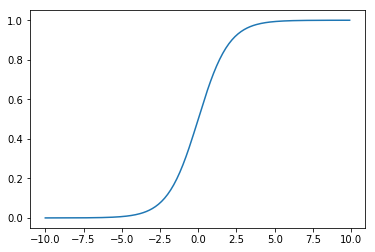

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math


x = np.arange(-10, 10, 0.1)  # -10 ~ 10まで0.1刻み
e = math.e  # 自然対数 
y = 1 / (1 + e**-x)  # シグモイド関数

plt.plot(x, y)
plt.show()

- 標準シグモイド関数は a=1 を代入して表す。  
- シグモイド関数式の eは自然対数である。
- シグモイド関数の性質は、0から1の単調増加関数で1つの変曲点を持つ。  
- 単調増加関数とは、値の変化が一定に増加する連続関数である。  
- 変曲点とは、曲線の曲がる方向が変わる点である。  

引用：https://ja.wikipedia.org/wiki/%E3%82%B7%E3%82%B0%E3%83%A2%E3%82%A4%E3%83%89%E9%96%A2%E6%95%B0

# Q2. Logistic Sigmoid をアクティベーション関数として持つ<br>パーセプトロンのモデルについて調べ説明せよ。

# A.

**パーセプトロンとは：**  
- パーセプトロンとは、視覚や脳の機能をモデル化したものでありパターン認識を行うシンプルなネットワーク。
- ネットワーク構成としては、(感覚層)入力層 → (連合層)中間層 → (反応層)出力層の3つからなる。  
- パターン認識とは、画像・音声などの雑多な情報を含むデータの中から、一定の規則や意味を持つ対象を選別して取り出す処理。  

**アクティベーション(活性化)関数とは：**  
- 伝達関数という意味でも捉えることができるが、入力層から与えられるデータが線形変換した後に、適用される関数
- パーセプトロンでの中間層にあたる。  



引用：  
https://ja.wikipedia.org/wiki/%E3%83%91%E3%83%BC%E3%82%BB%E3%83%97%E3%83%88%E3%83%AD%E3%83%B3  
https://ja.wikipedia.org/wiki/%E3%83%91%E3%82%BF%E3%83%BC%E3%83%B3%E8%AA%8D%E8%AD%98  